In [1]:
import pandas as pd

auto = pd.read_csv("../../data/Auto.csv", na_values='?').dropna().set_index("name")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [2]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [3]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
auto["origin"].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

**Quantitative Predictors:** mpg, cylinders, displacement, horsepower, weight, acceleration.
**Qualitative Predictors:** name, origin. (origin is quantitative because the numbers do not represent a real value, they're just codings)

In [5]:
def description(df):
    quantitative = df.columns.drop("origin")
    min_vals = df[quantitative].min()
    max_vals = df[quantitative].max()
    mean_vals = df[quantitative].mean()
    std_vals = df[quantitative].std()

    description = pd.DataFrame({
        'min': min_vals, 
        'max': max_vals, 
        'mean': mean_vals, 
        'standard deviation': std_vals
    })

    return description

In [6]:
description(auto)

,min,max,mean,standard deviation
mpg,9.0,46.6,23.445918,7.805007
cylinders,3.0,8.0,5.471939,1.705783
displacement,68.0,455.0,194.411990,104.644004
horsepower,46.0,230.0,104.469388,38.491160
weight,1613.0,5140.0,2977.584184,849.402560
acceleration,8.0,24.8,15.541327,2.758864
year,70.0,82.0,75.979592,3.683737


In [7]:
auto_dropped = auto.drop(auto.index[9:85])
description(auto_dropped)

,min,max,mean,standard deviation
mpg,11.0,46.6,25.041637,7.912874
cylinders,3.0,8.0,5.274021,1.632155
displacement,68.0,455.0,179.373665,95.512897
horsepower,46.0,230.0,98.715302,33.822711
weight,1755.0,4952.0,2881.505338,792.548494
acceleration,9.5,24.6,15.738790,2.570191
year,70.0,82.0,77.508897,2.989403


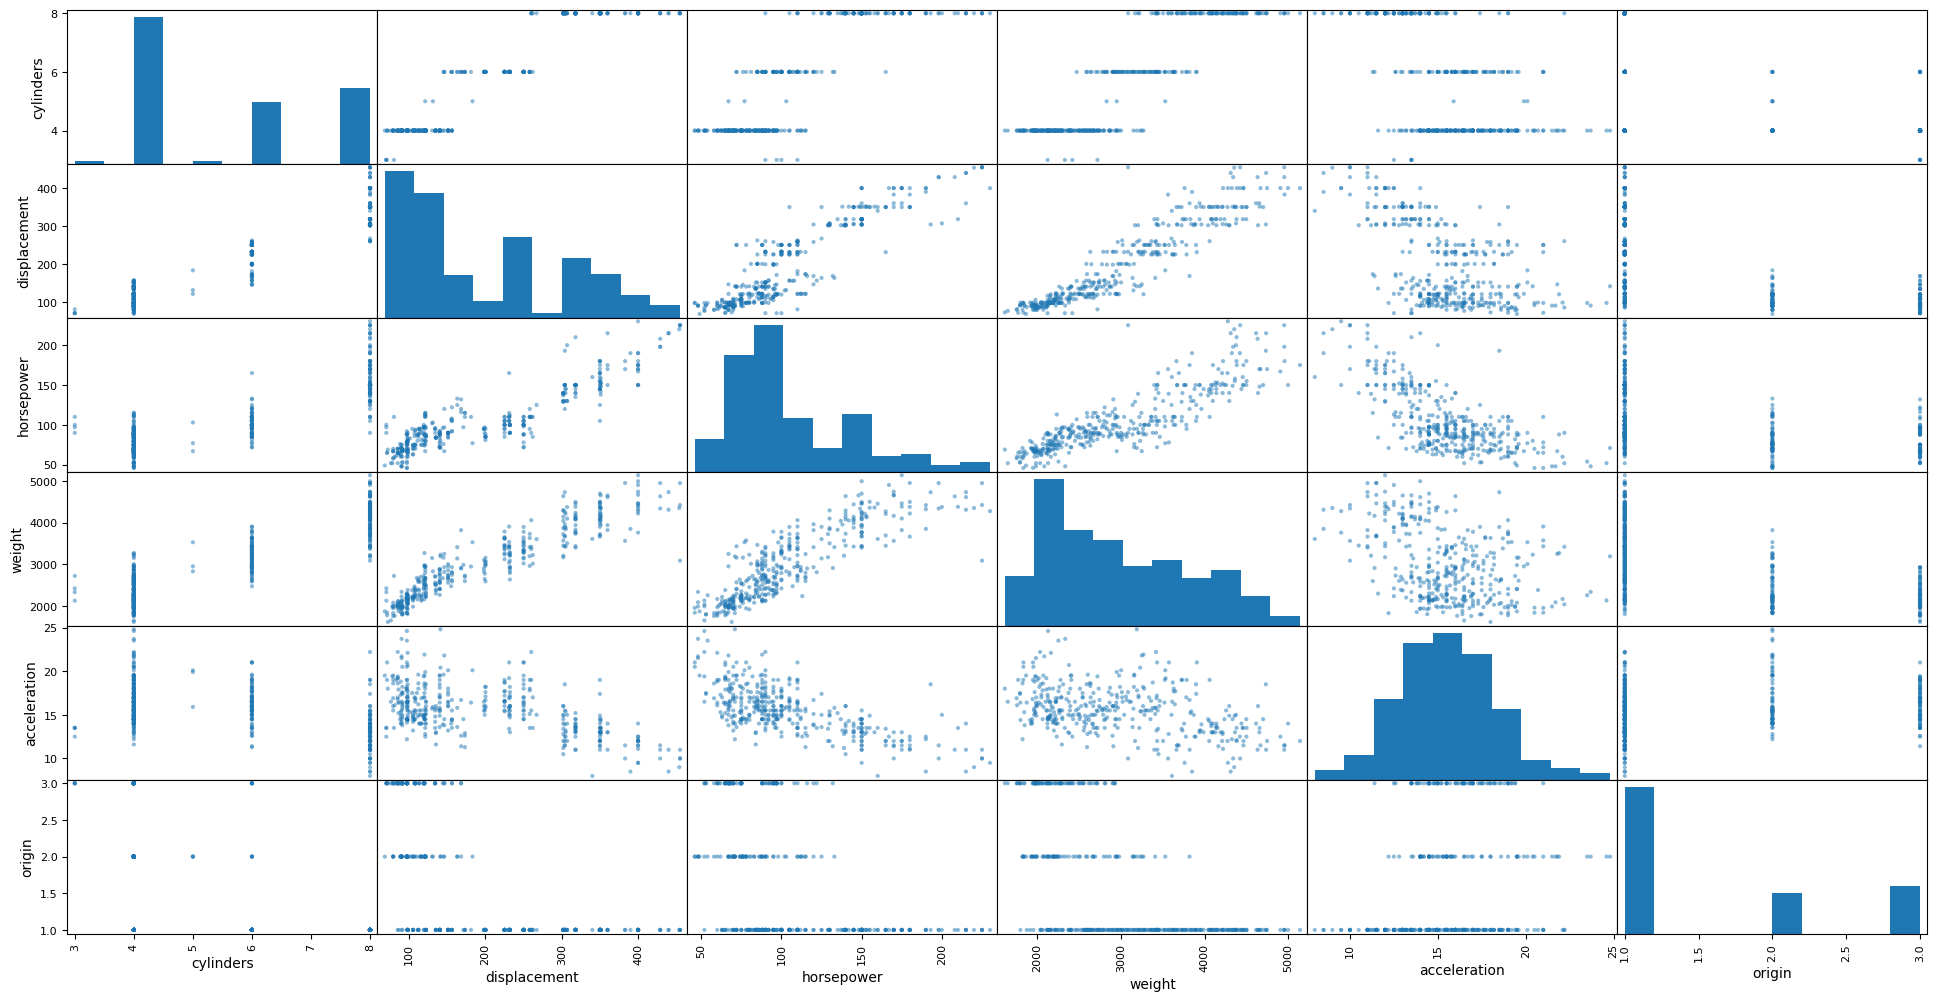

In [9]:
pd.plotting.scatter_matrix(auto[auto.columns.drop(["year", "mpg"])], figsize=(24, 12));

Based on the scatter plot, several relationships between the predictors are evident. For example, horsepower appears to increase linearly with weight, which makes sense, heavier cars typically require more power to operate efficiently. Interestingly, acceleration decreases as horsepower increases, which may seem counterintuitive. However, this can likely be explained by the indirect relationship between weight and horsepower: heavier cars tend to have more horsepower but also accelerate more slowly due to their mass. Additionally, displacement, which refers to the total volume of air and fuel displaced by the engine's pistons during one cycle, also increases linearly with both horsepower and weight, further reinforcing the link between engine size, power, and vehicle mass.

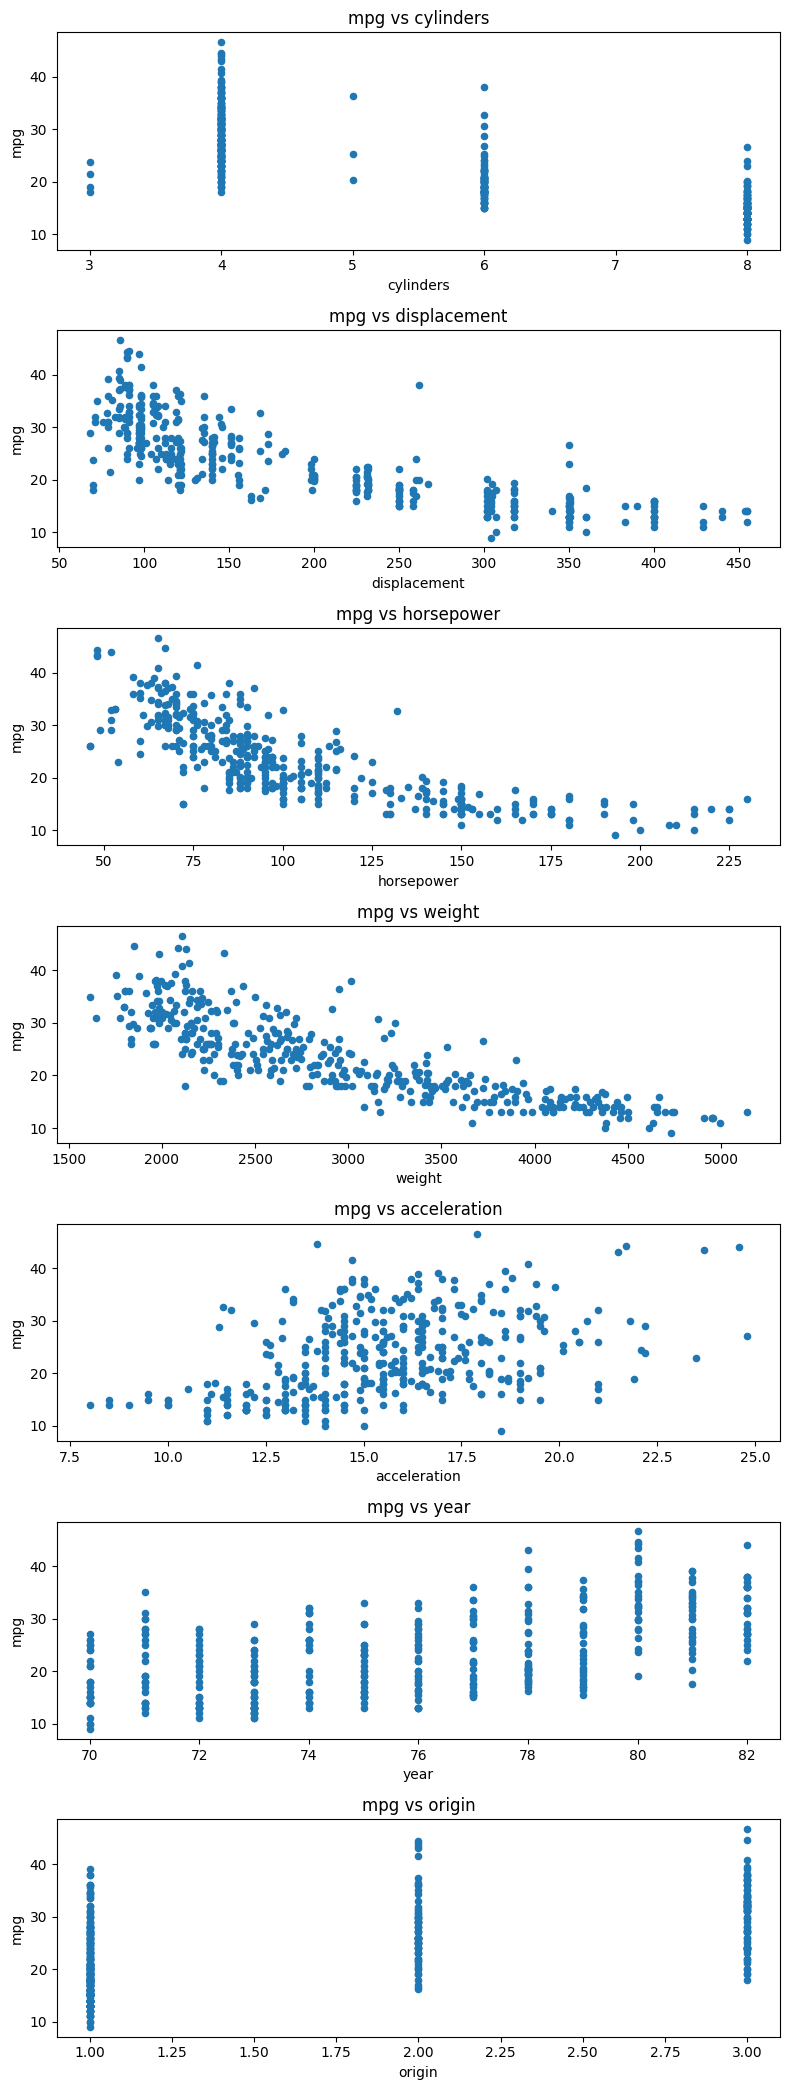

In [ ]:
import matplotlib.pyplot as plt

predictors = auto.columns.drop("mpg")
fig, axes = plt.subplots(len(predictors), 1, figsize=(8, 3 * len(predictors)))
for i, predictor in enumerate(predictors):
    ax = axes[i]
    auto.plot.scatter(x=predictor, y="mpg", ax=ax)
    ax.set_title(f"mpg vs {predictor}")
plt.tight_layout()
plt.show()

As shown in our plots, most predictors are directly associated with MPG (miles per gallon). There is a slight linear increase in MPG over time, suggesting improvements in fuel efficiency across model years. In contrast, MPG decreases as horsepower, weight, and displacement increase, indicating that more powerful and heavier vehicles tend to be less fuel-efficient. The relationship between cylinders and MPG also shows a general decreasing trend, although there's considerable variance, suggesting that cylinder count alone doesn't fully explain fuel efficiency.